# Fraud Detection 
**Dataset** : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [25]:
# Load necessary liblaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score)
from sklearn.model_selection import RandomizedSearchCV


# İgnoring unnecesary warnings
import warnings
warnings.filterwarnings("ignore")

print("Loading succesfull")

Loading succesfull


In [26]:
# Loading and reading dataset
df = pd.read_csv("creditcard.csv")
print("First 5 rows")
print("-" * 40)
df.head()

First 5 rows
----------------------------------------


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
print("-" * 40)
print("Shape")
print("-" * 40)
print(df.shape)

print("-" * 40)
print("İNFO")
print("-" * 40)
print(df.info())

print("-" * 40)
print("DESCRİBE")
print("-" * 40)
print(df.describe())

print("-" * 40)
print("COLUMNS  ")
print("-" * 40)
print(df.columns)


----------------------------------------
Shape
----------------------------------------
(284807, 31)
----------------------------------------
İNFO
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     2848

In [28]:
print("-" * 40)
print("Null Data")
print("-" * 40)
print(df.isnull().sum())

print("-" * 40)
print("Duplicated Data")
print("-" * 40)
print(df.duplicated().sum())

----------------------------------------
Null Data
----------------------------------------
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
----------------------------------------
Duplicated Data
----------------------------------------
1081


In [29]:
df = df.drop_duplicates()

In [30]:
df.rename(columns={"Class" : "Fraud"}, inplace= True)

In [31]:
class_counts = df["Fraud"].value_counts()
class_counts

Fraud
0    283253
1       473
Name: count, dtype: int64

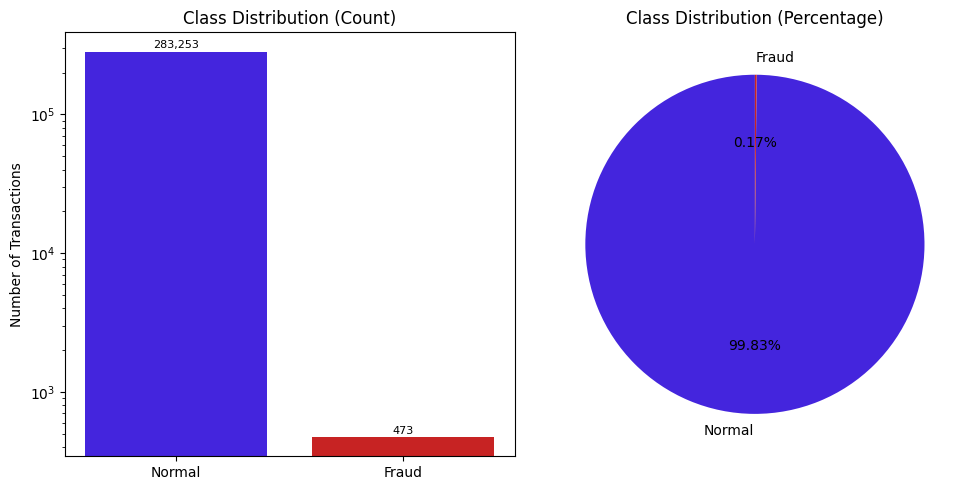

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot
bars = axes[0].bar(["Normal", "Fraud"],class_counts.values ,color=["#4425dd", "#c72323"])
axes[0].set_ylabel("Number of Transactions")
axes[0].set_title("Class Distribution (Count)")
axes[0].set_yscale("log")  # Log scale to see both classes

# Add value labels on top of bars
axes[0].bar_label(bars, labels=[f"{v:,}" for v in class_counts.values], 
                  label_type= "edge", fontsize= 8, padding= 1)

# Pie chart
colors = ["#4425dd", "#c72323"]
axes[1].pie(class_counts.values, labels= ["Normal", "Fraud"], 
            autopct="%1.2f%%", colors= colors, startangle= 90)
axes[1].set_title("Class Distribution (Percentage)")

plt.tight_layout()
plt.show()

In [33]:
# Splitting data 
X =df.drop("Fraud", axis = 1)
y = df["Fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 29)

In [34]:
#Training model
GBM = GradientBoostingClassifier(n_estimators= 100, random_state= 29)
GBM.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [35]:
y_pred = GBM.predict(X_test)

print("-" * 40)
print("Before Tuning")
print("-" * 40)

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("-" * 40)
print("Confusion Matrix")
print("-" * 40)
print(cm)

# 3. Classification Report
cr = classification_report(y_test, y_pred)
print("-" * 40)
print("Classification Report")
print("-" * 40)
print(cr)



----------------------------------------
Before Tuning
----------------------------------------
----------------------------------------
Confusion Matrix
----------------------------------------
[[56634     6]
 [   76    30]]
----------------------------------------
Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56640
           1       0.83      0.28      0.42       106

    accuracy                           1.00     56746
   macro avg       0.92      0.64      0.71     56746
weighted avg       1.00      1.00      1.00     56746



It performs well on normal transactions but poorly on fraud detection.

In [ ]:
# Hyperparameter Tuning
param_distributions = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator= GradientBoostingClassifier(random_state= 29),
    param_distributions= param_distributions,
    n_iter= 10,        
    cv= 3,             
    n_jobs= -1,        
    random_state= 29,  
    verbose= 1         
)

# Modeli eğit
random_search.fit(X_train, y_train)

# Sonuçlar
print("Best Parameters:", random_search.best_params_)




Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
# New model for best parameters
best_params = random_search.best_params_

GBM_tuned = GradientBoostingClassifier(
    n_estimators=best_params["n_estimators"],
    learning_rate=best_params["learning_rate"],
    max_depth=best_params["max_depth"],
    random_state= 29
)

GBM_tuned.fit(X_train, y_train)
y_pred_tuned = GBM_tuned.predict(X_test)

print("-" * 40)
print("After Tuning")
print("-" * 40)
print("-" * 40)
print("Confusion Matrix")
print("-" * 40)
print(confusion_matrix(y_test, y_pred_tuned))
print("-" * 40)
print("Classification Report")
print("-" * 40)
print(classification_report(y_test, y_pred_tuned))

